In [109]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [110]:
wine_data = pd.read_csv('winequality-red.csv')

In [111]:
# check the number of rows and columns
wine_data.shape

(1599, 12)

In [112]:
#checking missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [113]:
# data visualization and data analysis

# statical analysis
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [114]:
# number of values for each quality
wine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

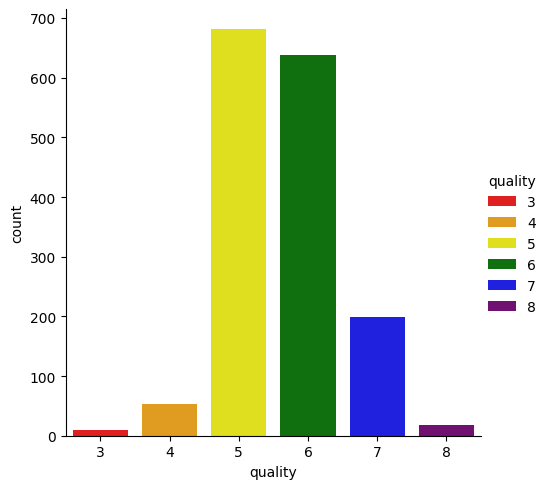

In [115]:
# Define custom colors for each bar
custom_colors = {
    3: 'red',
    4: 'orange',
    5: 'yellow',
    6: 'green',
    7: 'blue',
    8: 'purple'
}

# Pass the color mapping using the `palette` parameter
sns.catplot(x='quality', hue='quality', data=wine_data, kind='count', palette=custom_colors)
plt.show()

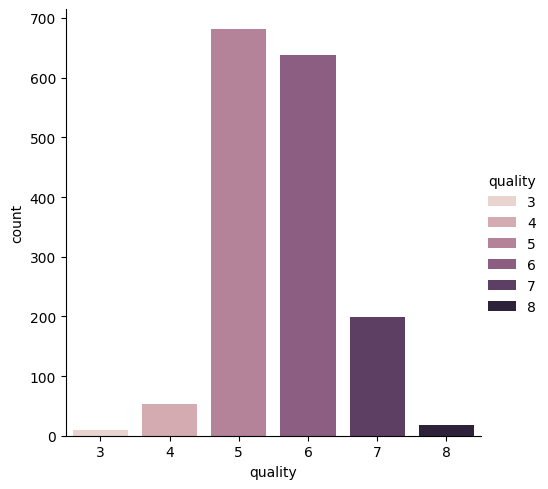

In [116]:
# plot the quality count in seaborn
sns.catplot(x= 'quality', hue='quality', data= wine_data, kind = 'count')

<Axes: xlabel='volatile acidity', ylabel='quality'>

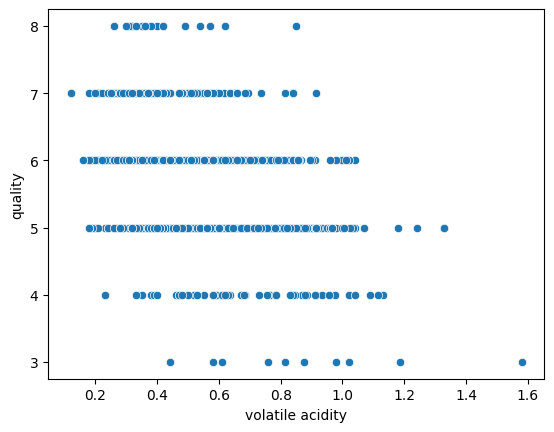

In [117]:
# plot volatile acidity vs quality
sns.scatterplot(x='volatile acidity', y='quality', data=wine_data)

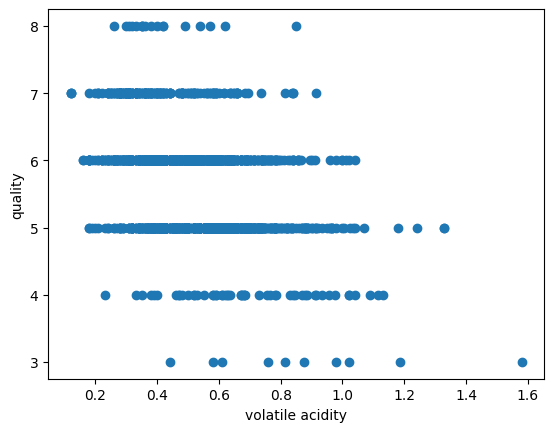

In [118]:
# using matplotlib
plt.scatter(wine_data['volatile acidity'], wine_data['quality'])
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

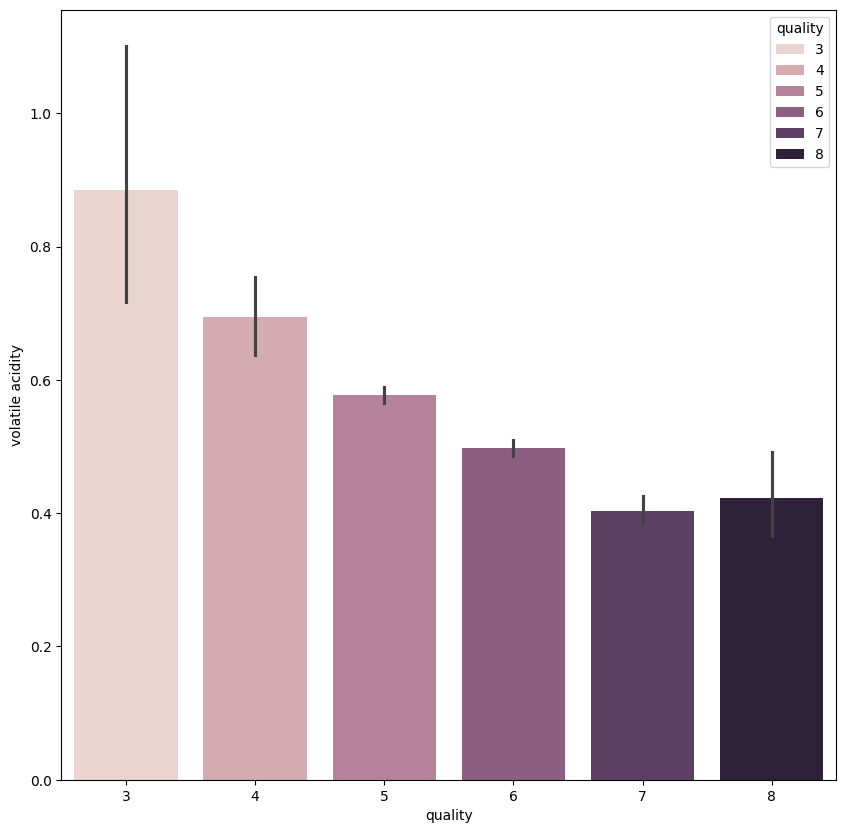

In [119]:
# vo;atile acidity vs quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x='quality',hue='quality', y='volatile acidity', data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

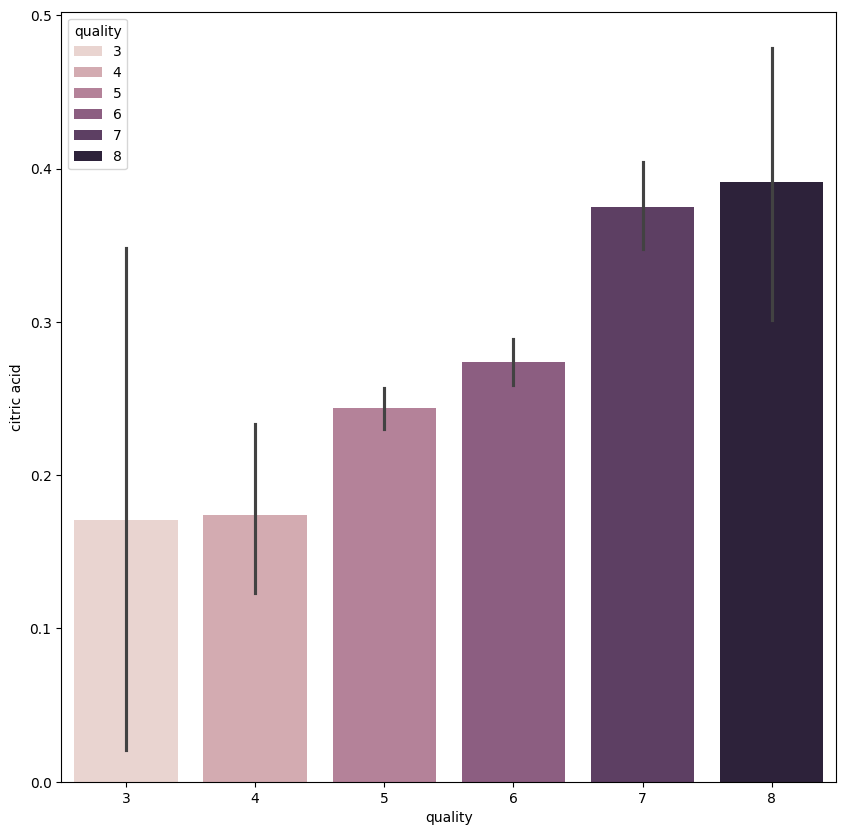

In [120]:
# vo;atile citric acid vs quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x='quality',hue='quality', y='citric acid', data=wine_data)

Text(0.5, 1.0, 'Correlation Matrix')

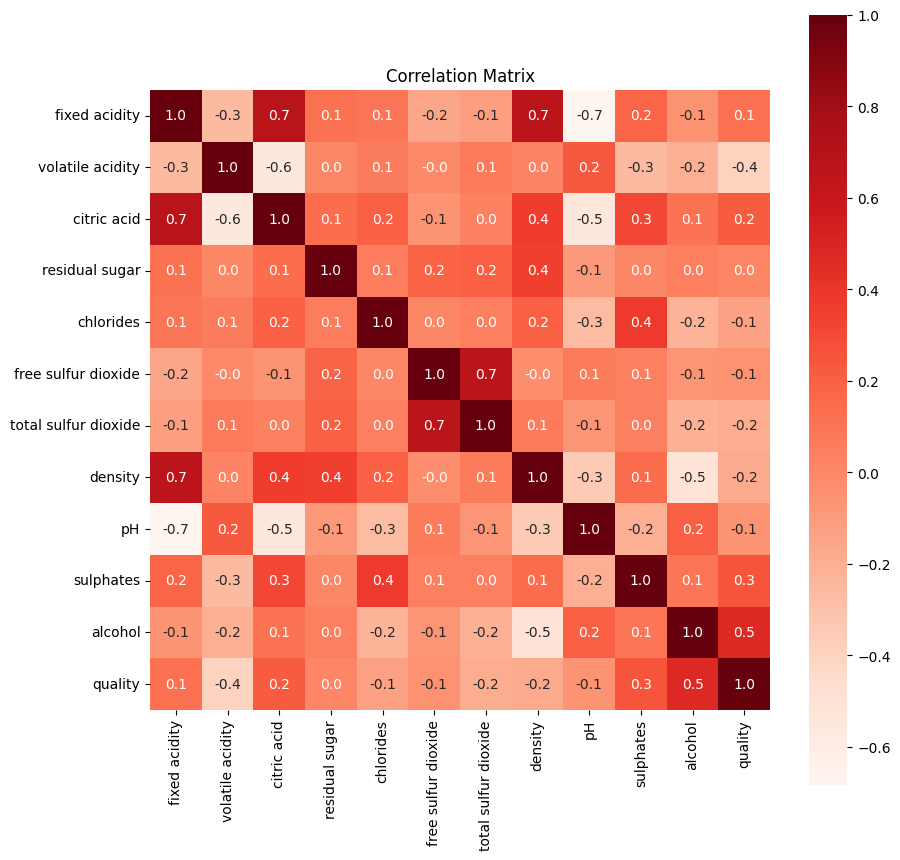

In [121]:
# heat map
correlation = wine_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Reds')
plt.title('Correlation Matrix')

In [122]:
# data preprocessing
# split data into training and testing sets
X = wine_data.drop(columns='quality', axis=1)
#Y = wine_data['quality']

In [123]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [124]:
# binarise the quality column
Y= wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [125]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [126]:
# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [127]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [128]:
# model training
# using randome forest classifier

model = RandomForestClassifier()
model.fit(X_train,Y_train)


RandomForestClassifier()

In [129]:
# model evaluation
# accuracy score on the training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy Score', test_data_accuracy)

Accuracy Score 0.928125


In [141]:
# build a predictive system
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array.shape)
print(input_data_as_numpy_array)
# reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped.shape)
print(input_data_reshaped)


# prediction
prediction = model.predict(input_data_reshaped)
print(prediction)


if prediction[0] ==1:
    print('The wine is good')
else:
    print('The wine is bad')

(11,)
[ 7.3     0.65    0.      1.2     0.065  15.     21.      0.9946  3.39
  0.47   10.    ]
(1, 11)
[[ 7.3     0.65    0.      1.2     0.065  15.     21.      0.9946  3.39
   0.47   10.    ]]
[1]
The wine is good


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
